In [1]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path 

In [44]:
PROJECT_ROOT = Path.cwd().parent

DATA = 'covid.db'

conn = sqlite3.connect(DATA)

query = """
SELECT 
    country, 
    SUM(daily_new_cases) AS total_cases, 
    SUM(daily_new_deaths) AS total_deaths,
    MIN(date(date)) AS count_begin,
    MAX(date(date)) AS count_end
FROM covid_cases
GROUP BY country  

"""

df = pd.read_sql(query, con=conn)


df[df['total_cases'] == df['total_cases'].max()] # Date should start from 2020-2-15 ?? 

,country,total_cases,total_deaths,count_begin,count_end
212,USA,84209458.0,1026646.0,2020-10-01,2021-12-31


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       226 non-null    object 
 1   total_cases   226 non-null    float64
 2   total_deaths  215 non-null    float64
 3   count_begin   226 non-null    object 
 4   count_end     226 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.0+ KB


In [43]:
df[df['count_begin'] == '2020-10-'] # All countries except two; China and USA 

,country,total_cases,total_deaths,count_begin,count_end
42,China,220994.0,5189.0,2020-1-22,2022-5-14


Between 2020-10-01 and 2022-05-14, USA has total of around 84 million cases, with 1.03 million deaths. This is the highest among all other countries. 

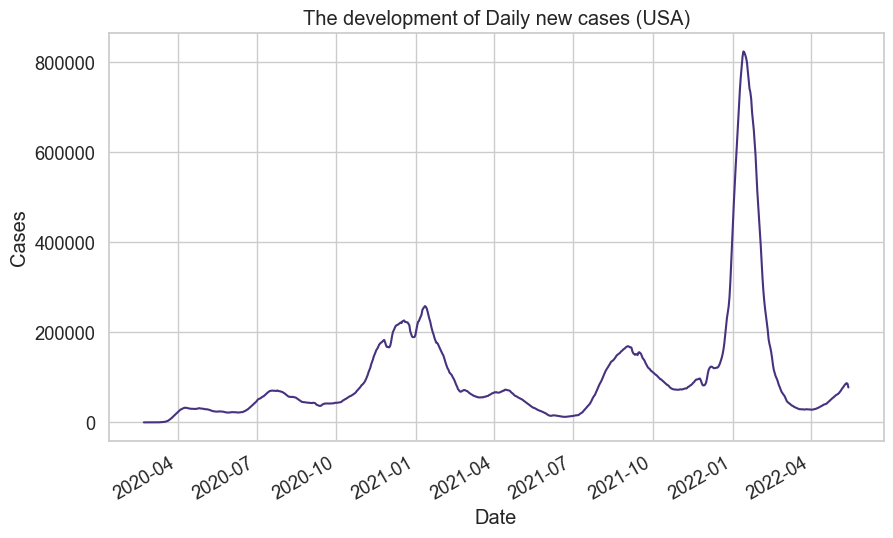

In [36]:
# Plot of USA Daily New Cases development

sns.set_theme(
    style="whitegrid",  
    context="notebook",  
    palette="viridis",   
    font="Arial",        
    font_scale=1.2       
)

# Making SQL query 
query = """
SELECT date, daily_new_cases, daily_new_deaths
FROM covid_cases 
WHERE country == 'USA'
"""

df_plot = pd.read_sql(query, conn)

fig, ax = plt.subplots(figsize=(10, 6))

df_plot['date'] = pd.to_datetime(df_plot['date'])

dates = df_plot['date']

# Since there are about 700 data points, we roll a 7 day average to make this plot smooth 
df_plot['cases_7d'] = df_plot['daily_new_cases'].rolling(7).mean()

ax.plot(dates, df_plot['cases_7d'], linestyle='-');
ax.set(xlabel='Date', ylabel='Cases', title='The development of Daily new cases (USA)')
fig.autofmt_xdate();